In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 =', h1,'h2 =', h2,'h3 =', h3)

print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

1/1 [==============================] - 1s 596ms/step
h1 = [[0.82954299 0.97900689]] h2 = [[1.50465102 0.68414336]] h3 = [[3.009302   1.36828668]]
Prediction from network  [[-1.7266781]]
Prediction from our computation  [[-1.72667795]]


Epoch 1/20
187/187 - 3s - loss: 0.0286 - 3s/epoch - 16ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0198 - 670ms/epoch - 4ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0159 - 721ms/epoch - 4ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0131 - 607ms/epoch - 3ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0110 - 614ms/epoch - 3ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0093 - 630ms/epoch - 3ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0084 - 676ms/epoch - 4ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0076 - 687ms/epoch - 4ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0068 - 704ms/epoch - 4ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0066 - 686ms/epoch - 4ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0061 - 657ms/epoch - 4ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0060 - 668ms/epoch - 4ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0057 - 645ms/epoch - 3ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0055 - 647ms/epoch - 3ms/step
Epoch 15/20
187/187 - 1s - loss: 0.0053 - 664ms/epoch - 4ms/step
Epoch 16/20
187/187 - 1s - loss: 0.0

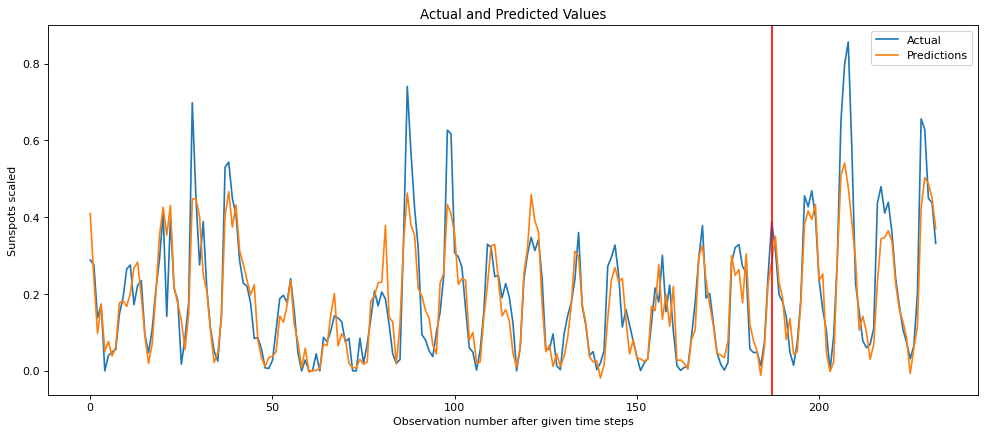

In [14]:
import math

from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
time_steps = 12
train_data, test_data, data = get_train_test(url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)